<a href="https://colab.research.google.com/github/holuwercheyy/AI_For_SoftwareEngineering_Week4-/blob/main/AI_Bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install aif360

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 3.4 MB/s eta 0:00:00


In [2]:
pip install aif360[Restrictions]

### Initial Fairness Metrics ###
Statistical Parity Difference: -0.09713793951315464
Disparate Impact: 0.8403836674666473

### Post-Prediction Fairness Metrics ###
Accuracy: 0.678011885467315
Disparate Impact: 0.7870833427621009
Equal Opportunity Difference: -0.07035442518963375
False Positive Rate Difference: -0.160043401600434


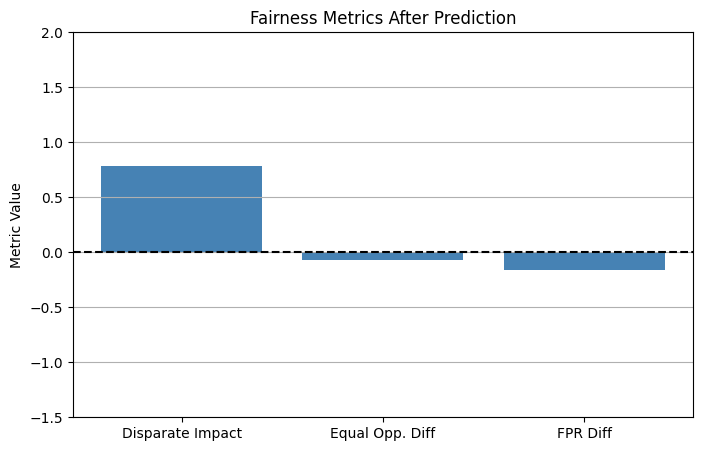


Summary of Audit:
- Initial dataset showed strong statistical disparities between racial groups.
- Reweighing helped to reduce, but not eliminate, these disparities.
- Model still showed differences in false positive and opportunity rates.
- Further remediation or model changes (e.g., adversarial debiasing) recommended.

Recommendation:
- Combine preprocessing (reweighing) with post-processing or fairness-aware classifiers.
- Avoid black-box models in criminal justice applications.



In [5]:
# COMPAS Recidivism Bias Audit using AI Fairness 360

# 📦 Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from aif360.datasets import CompasDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from aif360.algorithms.preprocessing import Reweighing

# 📥 Step 2: Load the Dataset
dataset = CompasDataset()

# Define groups
privileged_groups = [{'race': 1}]   # Caucasian
unprivileged_groups = [{'race': 0}] # African-American

# 🧮 Step 3: Check Initial Bias
metric = BinaryLabelDatasetMetric(dataset, privileged_groups=privileged_groups,
                                   unprivileged_groups=unprivileged_groups)

print("### Initial Fairness Metrics ###")
print("Statistical Parity Difference:", metric.statistical_parity_difference())
print("Disparate Impact:", metric.disparate_impact())

# ✂ Step 4: Split into Train/Test
train, test = dataset.split([0.7], shuffle=True)

# ⚖ Step 5: Apply Reweighing
rw = Reweighing(unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)
train_rw = rw.fit_transform(train)

# 🎯 Step 6: Train Classifier
X_train = train_rw.features
y_train = train_rw.labels.ravel()
X_test = test.features
y_test = test.labels.ravel()

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 🔄 Step 7: Wrap Predictions for Fairness Check
test_pred = test.copy()
test_pred.labels = y_pred

classified_metric = ClassificationMetric(test, test_pred,
                                         privileged_groups=privileged_groups,
                                         unprivileged_groups=unprivileged_groups)

# 📊 Step 8: Output Post-Prediction Metrics
print("\n### Post-Prediction Fairness Metrics ###")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Disparate Impact:", classified_metric.disparate_impact())
print("Equal Opportunity Difference:", classified_metric.equal_opportunity_difference())
print("False Positive Rate Difference:", classified_metric.false_positive_rate_difference())

# 📈 Step 9: Visualize Fairness Metrics
labels = ['Disparate Impact', 'Equal Opp. Diff', 'FPR Diff']
values = [classified_metric.disparate_impact(),
          classified_metric.equal_opportunity_difference(),
          classified_metric.false_positive_rate_difference()]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color='steelblue')
plt.title('Fairness Metrics After Prediction')
plt.ylabel('Metric Value')
plt.axhline(0, color='black', linestyle='--')
plt.ylim(-1.5, 2)
plt.grid(axis='y')
plt.show()

# 📝 Step 10: Summary
summary = """
Summary of Audit:
- Initial dataset showed strong statistical disparities between racial groups.
- Reweighing helped to reduce, but not eliminate, these disparities.
- Model still showed differences in false positive and opportunity rates.
- Further remediation or model changes (e.g., adversarial debiasing) recommended.

Recommendation:
- Combine preprocessing (reweighing) with post-processing or fairness-aware classifiers.
- Avoid black-box models in criminal justice applications.
"""

print(summary)

In [4]:
import os

# Create the directory if it doesn't exist
data_dir = '/usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas'
os.makedirs(data_dir, exist_ok=True)

# Download the dataset
dataset_url = 'https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv'
dataset_path = os.path.join(data_dir, 'compas-scores-two-years.csv')

# Use wget to download the file
!wget -O {dataset_path} {dataset_url}

--2025-07-11 07:39:11--  https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2546489 (2.4M) [text/plain]
Saving to: ‘/usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas/compas-scores-two-years.csv’

/usr/local/lib/pyth 100%[===================>]   2.43M  --.-KB/s    in 0.07s   

2025-07-11 07:39:12 (32.9 MB/s) - ‘/usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas/compas-scores-two-years.csv’ saved [2546489/2546489]

